In [23]:
!pip3 install geopandas contextily

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import numpy as np
from matplotlib.dates import DateFormatter

In [25]:
df = pd.read_parquet('../data/processed/penguin_tracking_processed.parquet')
df['datetime'] = pd.to_datetime(df['Timestamp'], unit='ms')

selected_bird_id = "ADPE28"  
df_filtered = df[df['BirdId'] == selected_bird_id]

geometry = [Point(xy) for xy in zip(df_filtered['Longitude'], df_filtered['Latitude'])]
gdf = gpd.GeoDataFrame(df_filtered, geometry=geometry, crs="EPSG:4326")

gdf_projected = gdf.to_crs(epsg=3857)

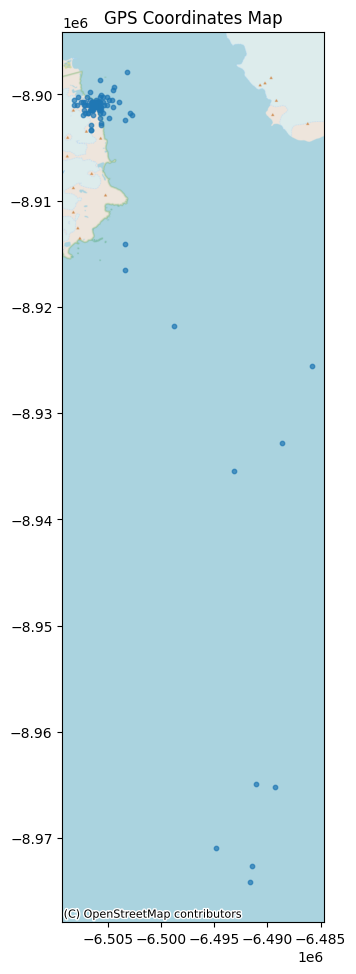

In [26]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_projected.plot(ax=ax, alpha=0.7, markersize=10)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title('GPS Coordinates Map')
plt.tight_layout()
plt.savefig('gps_map.png', dpi=300)
plt.show()

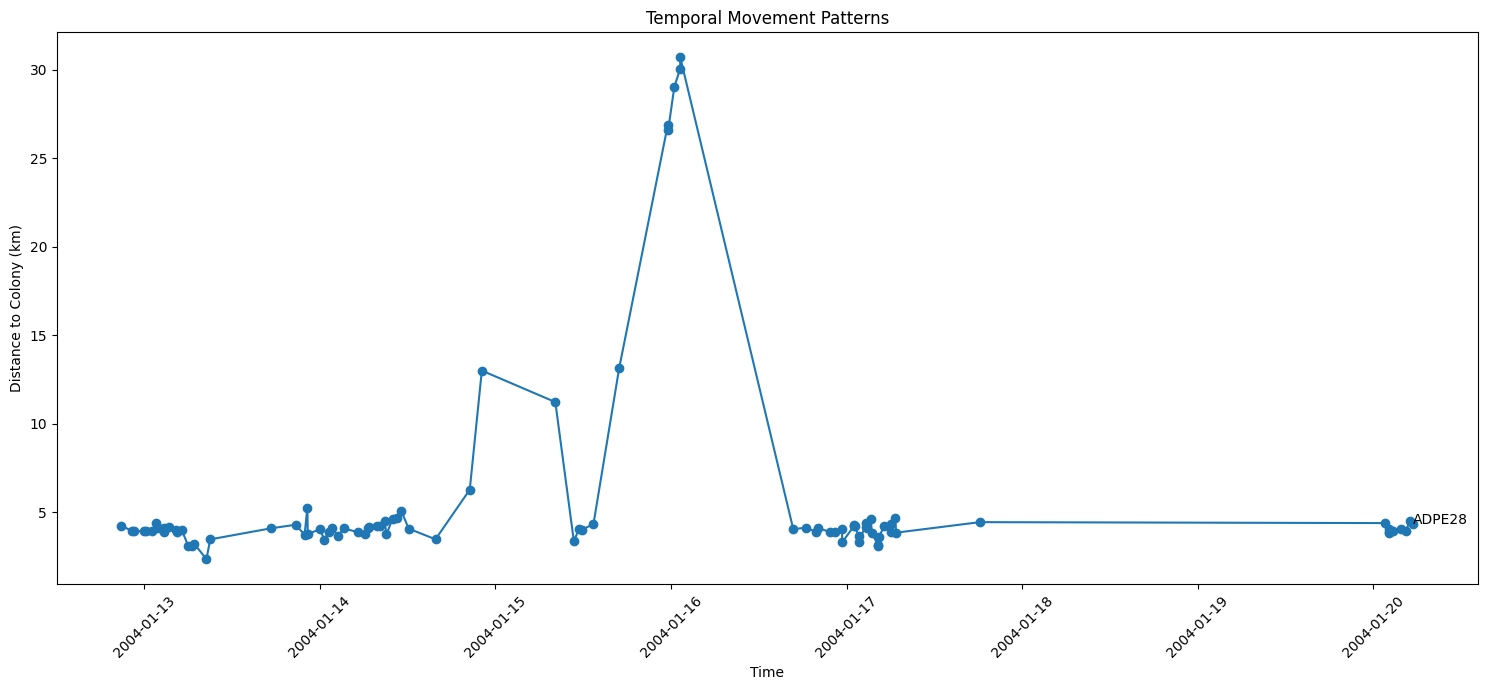

In [27]:
fig, ax = plt.subplots(figsize=(15, 7))
for bird_id, group in gdf.groupby('BirdId'):
    group = group.sort_values('datetime')
    ax.plot(group['datetime'], group['distance_to_colony_km'], 'o-', label=bird_id)
    ax.text(group['datetime'].iloc[-1], group['distance_to_colony_km'].iloc[-1], bird_id)

ax.set_xlabel('Time')
ax.set_ylabel('Distance to Colony (km)')
ax.set_title('Temporal Movement Patterns')
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('temporal_movement.png', dpi=300)
plt.show()